# Data Analysis in Geoscience Remote Sensing Projects: Exercises
## Final task handed in by: Marius Herrmann (2559255), on 2024-03-28
Hendrik Andersen, contact: hendrik.andersen@kit.edu

## Part one: Regression and sensitivity estimation with remote sensing data

For this part you are provided with a data set contained in the file 'data_final_task_regression.csv'. The data contains information on regional averages of low-cloud occurrence and meteorological factors in the Southeast Atlantic (10°S-20°S, 0°E-10°E - this means that the study area is about 1000 km x 1000 km large). The DataFrame contains the following variables:
- sst: sea surface temperature
- eis: estimated inversion strength
- t_adv: temperature advection
- w700: vertical pressure velocity at 700 hPa (this is the vertical wind speed, given in Pa/s: positive numbers mean subsiding air masses)
- rhft: relative humidity in the free troposphere (free troposphere is above the cloud layer)
- clf: Liquid water cloud fraction

The data on clouds are from a satellite data set from the MODIS sensor on board NASA's Terra satellite. The product name is MOD08_M3, downloaded from https://ladsweb.modaps.eosdis.nasa.gov/ for more information check out https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/MOD08_M3/#overview

The meteorological data are ERA5 reanalysis data on meteorological factors thought to be important for low cloud cover. The data is downloaded from https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

For more information on how reanalysis data are generated, check out the 2-minute video from Copernicus ECMWF here: https://www.youtube.com/watch?v=FAGobvUGl24

Your task is to analyze the data to
1. quantitatively and visually describe the data 
2. analyze relationships between cloud fraction and the cloud-controlling factors using
    - regression analysis
    - a machine learning model (e.g. feature importance, SHAP)
3. describe the results of your analyses in the provided markdown cells. Are your results in agreement with the described relationships in the following study?: Klein et al. (2017): Low-Cloud Feedbacks from Cloud-Controlling Factors: A Review, Surveys in Geophysics, doi: 10.1007/s10712-017-9433-3

## Part two: Classification in a remote sensing retrieval setting

For the second part of the exercise, you are tasked to develop a machine learning method to detect fog and low clouds for a location in the Namib Desert on the basis of observations from a geostationary satellite platform. You are provided a data set (ILIAS: 'data_final_task_classification.csv') of night-time satellite observations at different wave lengths over a meteorological measurement station. The geostationary satellite (Spinning Enhanced Visible and Infrared Imager; SEVIRI) makes a scan every 15 minutes at a spatial resolution of 3km x 3km. For the exact time steps of the satellite observations made available here, a boolean (True/False) data set on the presence of fog and low clouds from the measurement station is provided, which should be used as the labeled target data.
- IR_016: Measurements at the 1.6 µm channel
- IR_039: Measurements at the 3.9 µm channel
- IR_087: Measurements at the 8.7 µm channel
- IR_097: Measurements at the 9.7 µm channel
- IR_108: Measurements at the 10.8 µm channel
- IR_120: Measurements at the 12.0 µm channel
- IR_134: Measurements at the 13.4 µm channel
- station_fls: A boolean (True/False) information if fog or low clouds are present at the given time

Your task is to analyze the data to
1. Train and optimize a machine learning classifier (e.g. GradientBoostingClassifier) to detect fog and low clouds and analyze the results using a confusion matrix and using performance metrics
2. Compare the results to a logistic regression approach, and discuss  in the provided markdown cell which method is better at classifying fog and low cloud presence/absence
3. Compare the results to a dedicated detection approach developed for the region in Andersen and Cermak (2018): First fully diurnal fog and low cloud satellite detection reveals life cycle in the Namib, Atmospheric Measurement Techniques, doi: 10.5194/amt-11-5461-2018. Use the provided markdown cell for the discussion.

You can find more specific tasks in the cells below


## Part one: Regression and sensitivity estimation with remote sensing data
__Task__: 
In a typical scientific workflow, the first step is to get an overview of the data. Typically, visualizations and descriptive statistics are very useful to achieve this.  
1. Calculate the mean and standard deviation of cloud fraction and plot the distribution of cloud fraction in a histogram.
2. Plot the CLF time series and describe seasonal patterns.

In [2]:
# use this cell for your code, make sure to comment your code to make it understandable
# just to get you started:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
data_df = pd.read_csv("data_final_task_regression.csv", index_col='time', parse_dates=True)
data_df.tail

<bound method NDFrame.tail of                   sst       eis     t_adv      w700       rhft       clf
time                                                                    
2001-01-01  296.16850  4.824931 -1.682254  0.022467  35.642094  0.663396
2001-02-01  297.11526  3.476827 -1.932790  0.026573  37.940147  0.605880
2001-03-01  298.15900  2.265783 -2.199120  0.031560  33.834457  0.529290
2001-04-01  298.17062  2.402812 -2.532412  0.039651  21.565330  0.464151
2001-05-01  297.06927  3.534788 -2.962148  0.037318   7.997189  0.318764
...               ...       ...       ...       ...        ...       ...
2020-06-01  295.68103  5.696461 -3.336127  0.031689   5.904962  0.516174
2020-07-01  294.38498  6.359473 -2.678568  0.028419   6.503685  0.563987
2020-09-01  292.41327  9.211763 -3.231832  0.036699  22.365800  0.865068
2020-10-01  292.64000  9.838054 -2.885142  0.035826  30.144438  0.829819
2020-12-01  294.97546  7.004688 -2.187228  0.031764  27.698963  0.792711

[213 rows x 6 column

In [3]:
# Interpolate missing data
data_df.resample('m').mean().interpolate()

,sst,eis,t_adv,w700,rhft,clf
time,,,,,,
2001-01-31,296.168500,4.824931,-1.682254,0.022467,35.642094,0.663396
2001-02-28,297.115260,3.476827,-1.932790,0.026573,37.940147,0.605880
2001-03-31,298.159000,2.265783,-2.199120,0.031560,33.834457,0.529290
2001-04-30,298.170620,2.402812,-2.532412,0.039651,21.565330,0.464151
2001-05-31,297.069270,3.534788,-2.962148,0.037318,7.997189,0.318764
...,...,...,...,...,...,...
2020-08-31,293.399125,7.785618,-2.955200,0.032559,14.434742,0.714527
2020-09-30,292.413270,9.211763,-3.231832,0.036699,22.365800,0.865068
2020-10-31,292.640000,9.838054,-2.885142,0.035826,30.144438,0.829819


In [4]:
# 1. Calculate the mean and standard deviation of cloud fraction
clf = data_df["clf"]

m = clf.mean()
std = clf.std()

print("The mean cloud fraction is %.3f with a standard deviation of %.3f."%(m, std))
print("This means that approximately 95%% of the data lies between %.3f (lower boundary) and %.3f (upper boundary), assuming a normal distribution."%((m-2*std), (m+2*std)))

The mean cloud fraction is 0.652 with a standard deviation of 0.155.
This means that approximately 95% of the data lies between 0.341 (lower boundary) and 0.963 (upper boundary), assuming a normal distribution.


c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

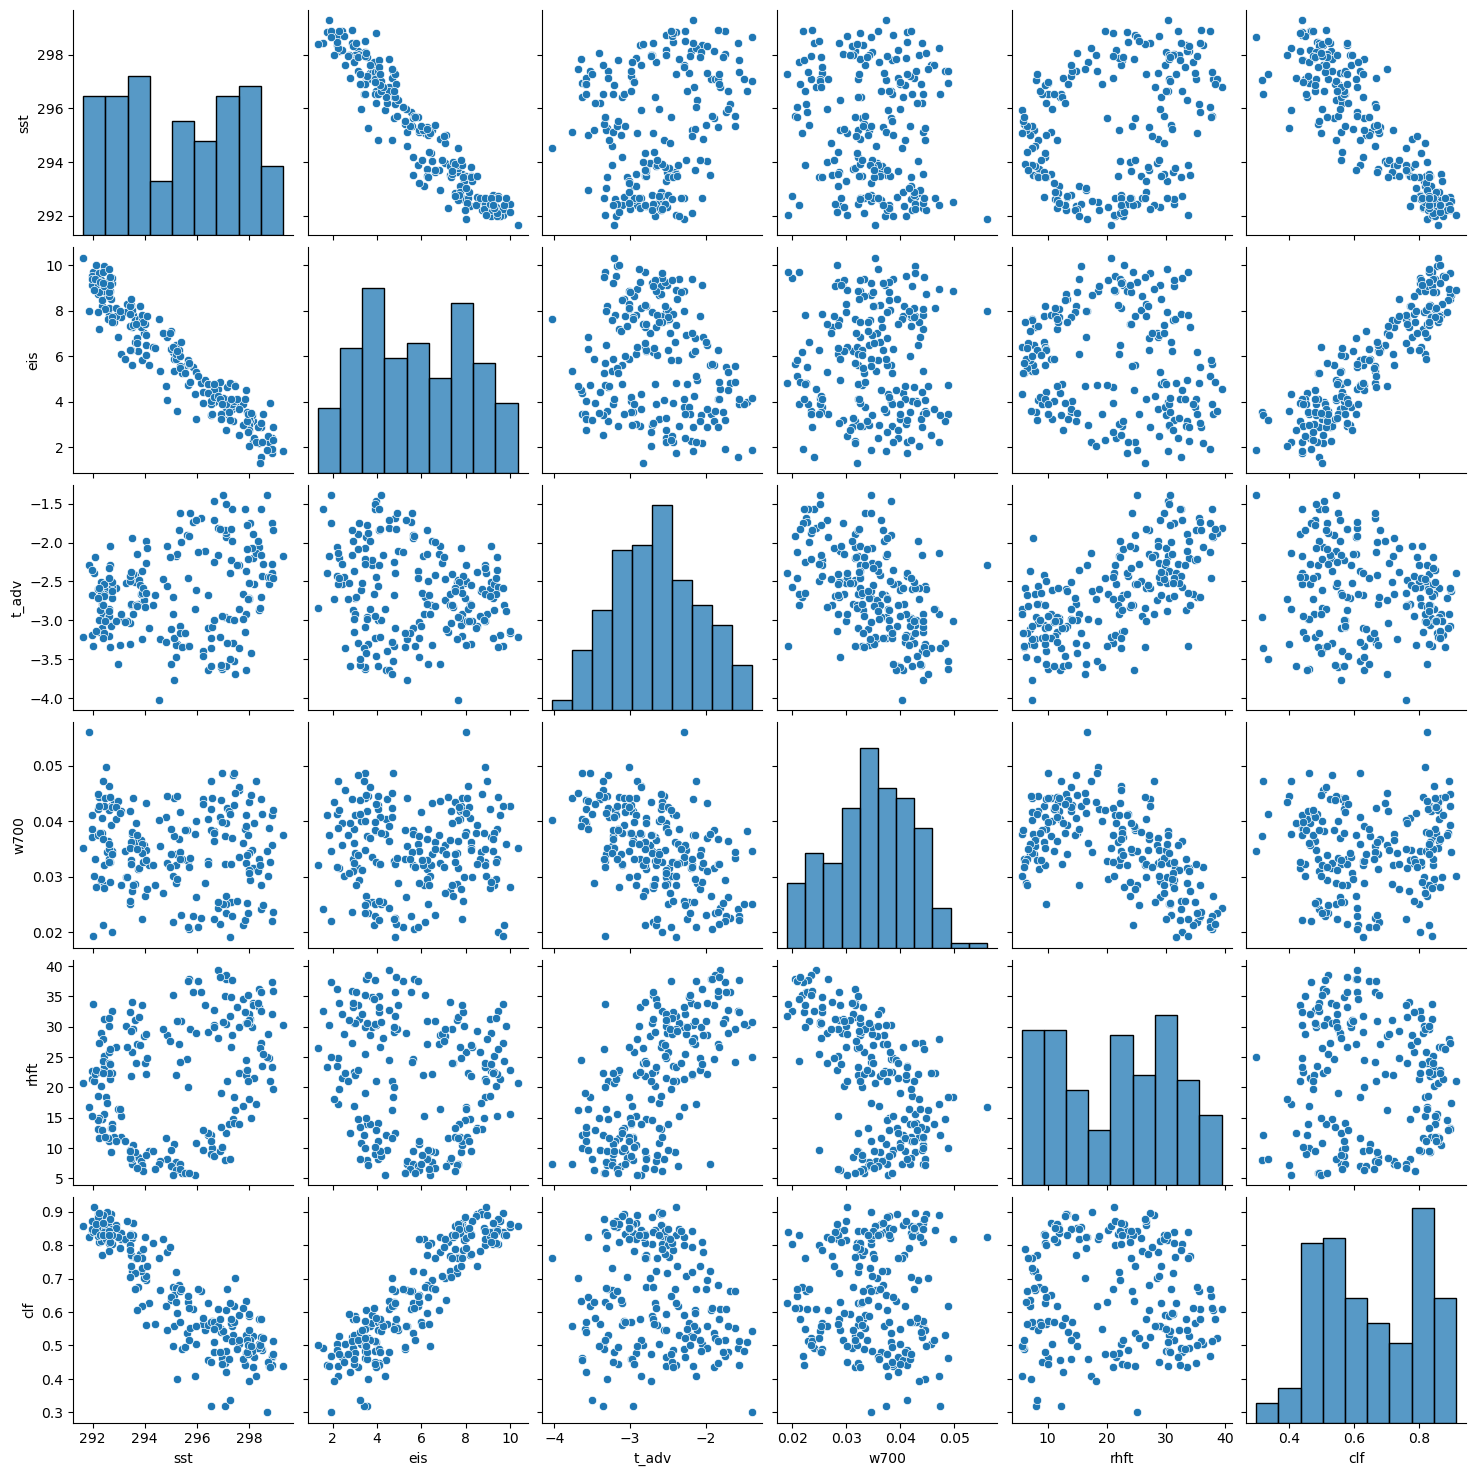

In [5]:
# Get overview of all observations using seaborn

sb.pairplot(data_df)
plt.show()

There is a strong negative correlation between sea surface temperature (sst) and estimated inversion strength (eis), as well as sea surface temperature (sst) and liquid water cloud fraction (clf).<br>
There is a strong positive correlation between eis and clf.<br>
There are moderate correlations between temperature advection (t_adv) and vertical pressure velocity at 700hPa (w700), as well as t_adv and relative humidity in the free troposphere (rhft). They are <br>&emsp;negative for the former and positive for the latter. t_adv is also nearly normally distributed.<br>
There exists a moderate negative correlation between w700 abd rhft. w700 is also nearly normally distributed.<br>

Other than that there do not seem to exist any meaningful correlations.

Text(0.5, 0, 'Cloud fraction')

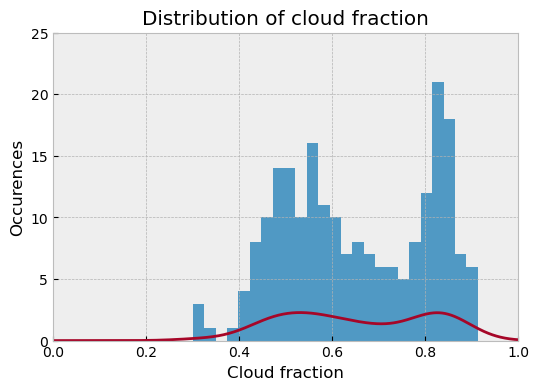

In [6]:
# 1.plot the distribution of cloud fraction in a histogram.
plt.style.use("bmh")

fig, ax = plt.subplots(figsize = (6,4))

# plot histogram
clf.plot(kind="hist", alpha = 0.85, bins = 25)

# plot kernel density estimation to make peaks even more visible
clf.plot(kind="kde")

ax.set_ylim(0,25)
ax.set_xlim(0,1)
ax.set_title("Distribution of cloud fraction")
ax.set_ylabel("Occurences")
ax.set_xlabel("Cloud fraction")


Judging by the kernel density estimation, the data is not normally distributed but bimodally distributed. This means that methods assuming a gaussian distribution are not well suited for our analysis. 
The most common measurement in our dataset is between 0.82 and 0.86. There are no days without or with full cloud cover in our dataset.

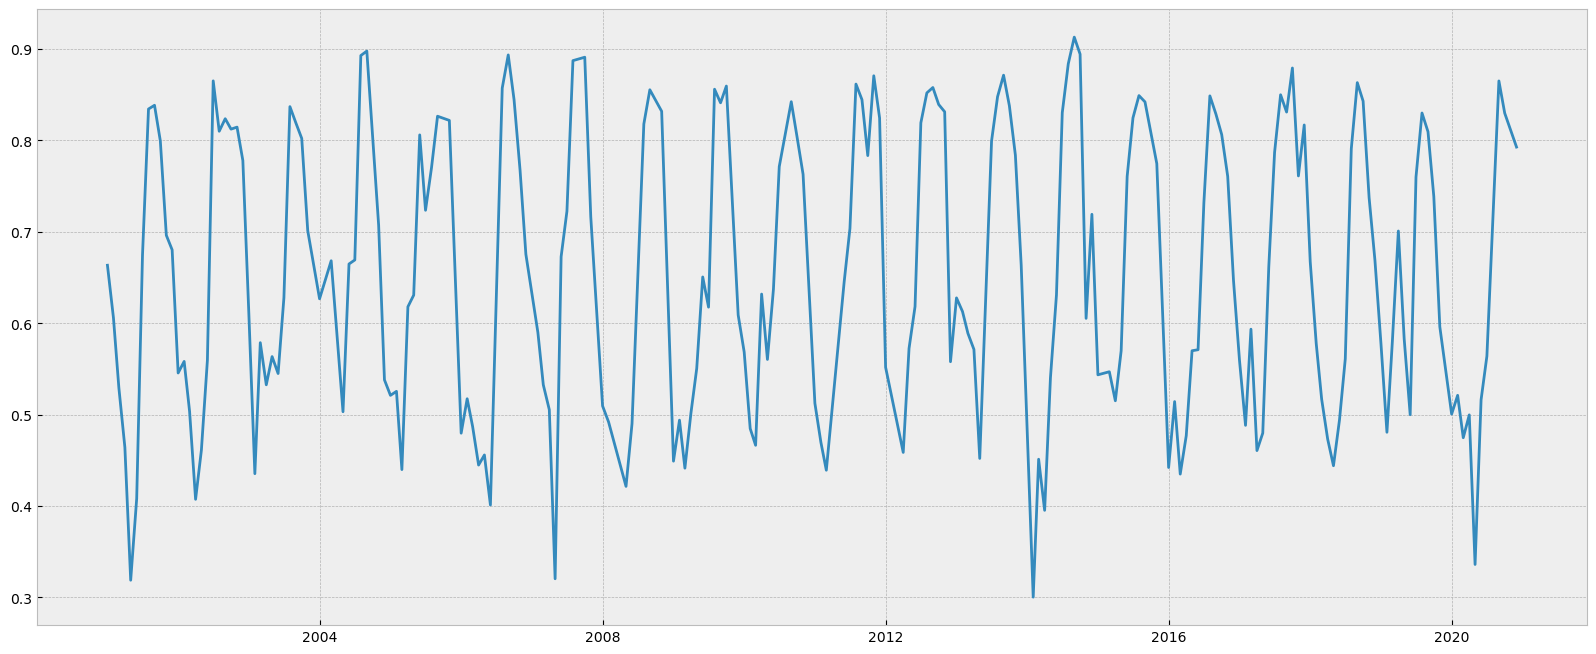

In [7]:
# 2. Plot the CLF time series
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(clf)


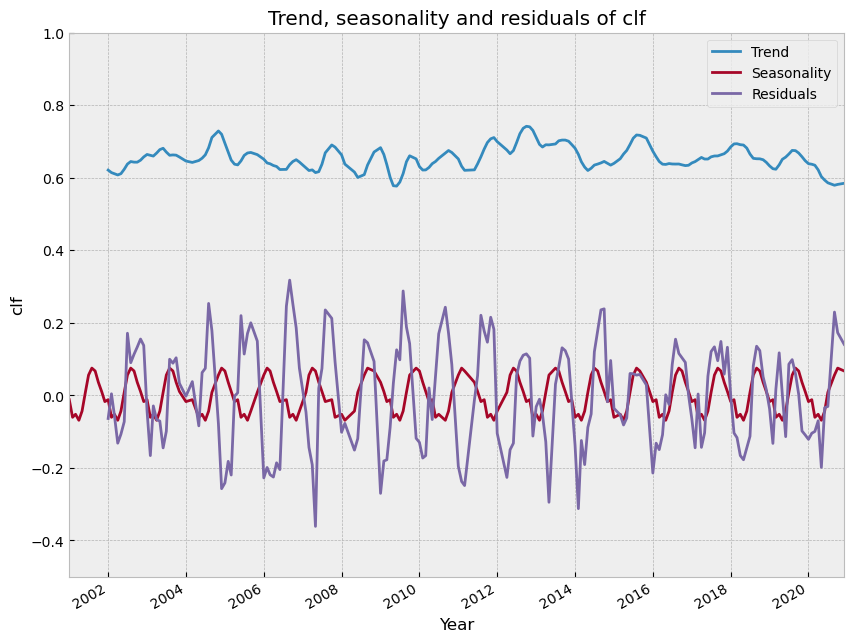

In [8]:
 # 2. Describe seasonal patterns.
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(x=clf, model='additive', period = 12, two_sided=False)

fig, ax = plt.subplots(figsize = (10,8))

decomp.trend.plot(label="Trend")
decomp.seasonal.plot(label="Seasonality")
decomp.resid.plot(label="Residuals")

ax.set_title("Trend, seasonality and residuals of clf")
ax.set_xlabel("Year")
ax.set_ylabel("clf")
ax.set_ylim(-0.5,1)
ax.set_xlim("2000-12-31", "2020-12-01")
ax.legend()

The trend behaves relatively stationary.
Surprisingly, seasonality plays only a small role in the resulting clf. 
Instead the residual effects are very strong.

__Task__: 
1. Compute a regression analysis of CLF with each meteorological predictor
2. Describe the sensitivities of CLF to the meteorological predictors:
    - How sensitive are low clouds to changes in meteorological predictors (in individual simple regression models, and in a multiple regression framework)?
    - Are the relationships significant?
    - Are there strong correlations between the different predictors that could influence the sensitivity estimates?
  
For the multiple linear regression, you want to be able to compare the sensitivity estimates of the different predictors (to see which ones are most important). To do this, the predictors need to be on the same scale. This is done in the code cell below by using the standard scaler (it subtracts the mean and divides by a standard deviation, so that all predictors in X have a mean value of 0 and unit variance).

In [9]:
from sklearn.preprocessing import StandardScaler

X = data_df.drop(['clf'],axis=1)
y = data_df.clf

X_standardized = StandardScaler().fit(X).transform(X)

In [10]:
# Merge standardized predictors and predictand into a dataframe to make using statsmodels OLS possible

t = pd.DataFrame(data = X_standardized).astype(float)
t.index = data_df.index
t.rename(columns={0:'sst', 1:'eis', 2:'t_adv', 3: 'w700', 4: 'rhft'}, inplace=True)
t = t.merge(y.rename('clf'), left_index=True, right_index=True)

In [11]:
# 2. Describe the sensitivities of CLF to the meteorological predictors: How sensitive are low clouds to changes in meteorological predictors
# (in individual simple regression models, and in a multiple regression framework)?
from scipy.stats import linregress

# Fit individual simple regression models

# SST
slope, intercept, rvalue, pvalue, stderr = linregress(t["sst"],t["clf"])
print("SST   || slope: %f, intercept: %f, rvalue: %f, pvalue: %f, stderr %f"%(slope, intercept, rvalue, pvalue, stderr))

# EIS
slope, intercept, rvalue, pvalue, stderr = linregress(t["eis"],t["clf"])
print("EIS   || slope: %f, intercept: %f, rvalue: %f, pvalue: %f, stderr %f"%(slope, intercept, rvalue, pvalue, stderr))

# T_ADV
slope, intercept, rvalue, pvalue, stderr = linregress(t["t_adv"],t["clf"])
print("T_ADV || slope: %f, intercept: %f, rvalue: %f, pvalue: %f, stderr %f"%(slope, intercept, rvalue, pvalue, stderr))

# RHFT
slope, intercept, rvalue, pvalue, stderr = linregress(t["rhft"],t["clf"])
print("RHFT  || slope: %f, intercept: %f, rvalue: %f, pvalue: %f, stderr %f"%(slope, intercept, rvalue, pvalue, stderr))

# W700
slope, intercept, rvalue, pvalue, stderr = linregress(t["w700"],t["clf"])
print("w700  || slope: %f, intercept: %f, rvalue: %f, pvalue: %f, stderr %f"%(slope, intercept, rvalue, pvalue, stderr))

SST   || slope: -0.137616, intercept: 0.652246, rvalue: -0.887675, pvalue: 0.000000, stderr 0.004914
EIS   || slope: 0.140118, intercept: 0.652246, rvalue: 0.903815, pvalue: 0.000000, stderr 0.004567
T_ADV || slope: -0.025968, intercept: 0.652246, rvalue: -0.167501, pvalue: 0.014384, stderr 0.010522
RHFT  || slope: -0.010660, intercept: 0.652246, rvalue: -0.068758, pvalue: 0.317905, stderr 0.010647
w700  || slope: 0.002441, intercept: 0.652246, rvalue: 0.015745, pvalue: 0.819294, stderr 0.010671


SST, EIS and T_ADV are significant. The relation between the predictand and RHFT, as well as w700 on the other hand is insignificant. <br>
Both RHFT T_ADV are only sensitive by a really small (negative) margin. SST and EIS are both about equally as sensitive but the former is negatively sensitive, while the latter is positively sensitive.<br>
w700 is negligibly positively sensitive.
This means that for e.g. an increase of EIS of one unit, the predictand increases by ~ 0.14.

In [13]:
# 1. Compute a regression analysis of CLF with each meteorological predictor
import statsmodels.formula.api as smf

# Assume an additive model

reg = smf.ols(formula = 'clf ~ sst + eis + t_adv + rhft + w700', data = t).fit()
print(reg.summary())
print("\n\nP-Values:\n", reg.pvalues)

                            OLS Regression Results                            
Dep. Variable:                    clf   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     222.9
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           2.96e-81
Time:                        15:15:19   Log-Likelihood:                 292.25
No. Observations:                 213   AIC:                            -572.5
Df Residuals:                     207   BIC:                            -552.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6522      0.004    152.939      0.0

Even though linear regression assumes underlying gaussian distributions for the predictors, the results are very good (Adjr2 of 0.84). This might be due to the obviously linear relationships between some of the predictors and the predictand and the negligibility of the skewness of their distribution. <br> <br>

All relations between predictors and predictand except for w700 are significant. This was not the case for RHFT in the univariate linear regression. The t values also indicate a low variance of predictors. <br><br>

In comparison to the univariate models the predictand is over all less sensitive to the predictors. In addition, the sign of the coefficient of RHFT has changed.


<Axes: >

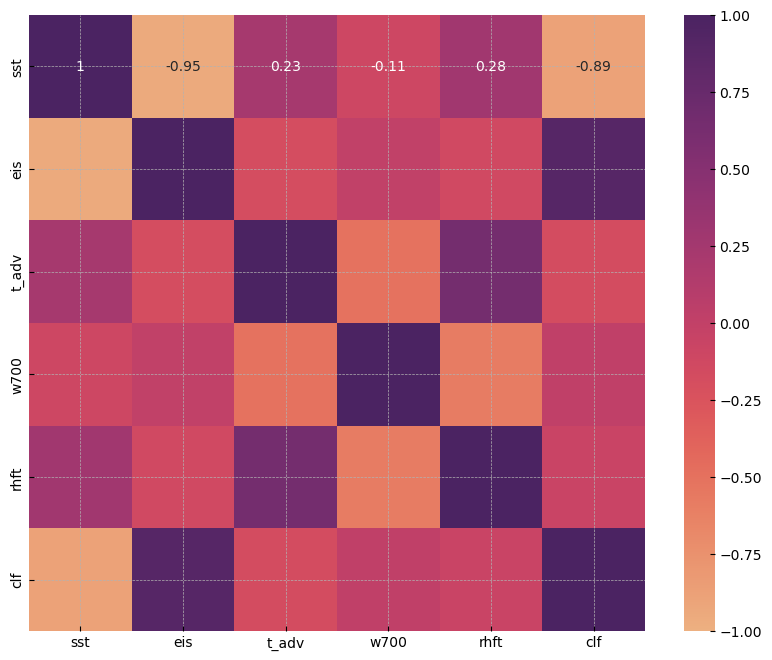

In [14]:
# 2. Describe the sensitivities of CLF to the meteorological predictors: Are there strong correlations between the different predictors that could influence the sensitivity estimates?
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = data_df.corr()

# The missing annotations seem to be caused by a bug in my version of seaborn
sns.heatmap(corr,
    cmap=sns.color_palette("flare", as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True)

The results from earlier still hold. For correlations between predictors the following exist: <br>
    &emsp;There is a strong negative correlation between sst and eis (-0.95).<br>
    &emsp;There is a moderate negative correlation between t_adv and w700 (-0.51).<br>
    &emsp;There is a moderate positive correlation between t_adv and rhft (0.65).<br>
    &emsp;There is a moderate negative correlation between w700 and rhft (-0.59).<br>
Thus, the results are most likely influenced by the multicolinearity.

__Task__:
Use a machine learning model to 
1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to visualize model performance and check for overfitting. Do the same for a multiple linear regression model, is the machine learning model better than the multiple regression?
3. Which predictors are most important for the model to predict CLF? [feature importance]
4. Analyze the two most important meteorological features in more detail: How do they influence the prediction of CLF? [partial dependency, SHAP] 

In [15]:
# use this cell for your code, make sure to comment your code to make it understandable
# some code to help you get started:
X = data_df.drop(['clf'],axis=1)
y = data_df.drop(['sst','eis','w700','rhft','t_adv'],axis=1)

from sklearn.model_selection import train_test_split

# Split training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [16]:
# 1. Predict CLF as accurately as possible [low validation error (e.g. MSE or RMSE) and high explained variance (R²), tuning of hyperparameters]
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize a random forest model
rf = RandomForestRegressor(random_state = 17, verbose=0)
rf.get_params()

# Define bounds for the hyperparameters in random search
rshp = {'bootstrap': [True, False],
 'max_depth': [40, 50, 60, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1800, 2000, 2200]}

# Conduct random search
rs = RandomizedSearchCV(rf, rshp, n_iter = 100, n_jobs = -1, verbose = 0, cv = 3)

# Fit model 
rs.fit(X_train, y_train)
best_rf = rs.best_estimator_

c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [17]:
# Show tuned hyperparameters
best_rf

RandomForestRegressor(max_depth=50, n_estimators=2000, random_state=17)

In [18]:
# Train a random forest model with standard hyperparameters
standard_rf = RandomForestRegressor(random_state = 17, verbose = 0)
standard_rf.fit(X_train, y_train)

C:\Users\mfher\AppData\Local\Temp\ipykernel_17276\3893254328.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  standard_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=17)

In [19]:
# Train a multivariate linear regression model exclusively on the training set
trs = X_train.merge(y_train, left_index=True, right_index=True)
tr_reg = smf.ols(formula = 'clf ~ sst + eis + t_adv + rhft + w700', data = trs).fit()

tr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clf   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           1.70e-72
Time:                        15:18:17   Log-Likelihood:                 262.80
No. Observations:                 191   AIC:                            -513.6
Df Residuals:                     185   BIC:                            -494.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.2670      2.393      5.126      0.000       7.546      16.988
sst           -0.0404      0.008     -5.044      0.000      -0.056      -0.025
eis            0.0241      0.007      3.243      0.001       0.009       0.039
t_adv         -0.0230      0.011     -2.094      0.038      -0.045      -0.001
rhft           0.0034      0.001      4.540      0.000       0.002       0.005
w700           0.8980      0.765      1.174      0.242      -0.611       2.407
==============================================================================
Omnibus:                        5.072   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.747
Skew:                          -0.377   Prob(JB):                       0.0932
Kurtosis:                       3.166   Cond. No.                     1.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE of the multivariate LRM:", mean_absolute_error(y_test, tr_reg.predict(X_test)))
print("MAE of the standard RF:", mean_absolute_error(y_test, standard_rf.predict(X_test)))
print("MAE of the RF using random search for hyperparameter tuning:", mean_absolute_error(y_test, rs.predict(X_test)))

print("\nMSE of the multivariate LRM:", mean_squared_error(y_test, tr_reg.predict(X_test)))
print("MSE of the standard RF:", mean_squared_error(y_test, standard_rf.predict(X_test)))
print("MSE of the RF using random search for hyperparameter tuning:", mean_squared_error(y_test, rs.predict(X_test)))

MAE of the multivariate LRM: 0.044457447056485806
MAE of the standard RF: 0.03889209249239764
MAE of the RF using random search for hyperparameter tuning: 0.038036929875965624

MSE of the multivariate LRM: 0.004126052964270808
MSE of the standard RF: 0.0027369650039222263
MSE of the RF using random search for hyperparameter tuning: 0.0026532151067578304


In [21]:
# Calculate how much variance can be explained by the tuned rf model (Adjusted R2)
from sklearn.metrics import r2_score

r2= r2_score(y_test, rs.predict(X_test))

adj_r2 = 1-(1-r2)*(t.shape[0]-1)/(t.shape[0]-t.shape[1]-1)
print("R2-score:", r2, "\nAdjusted R2-score:", adj_r2)

R2-score: 0.8938120525982945 
Adjusted R2-score: 0.8907191997613517


While the multivariate linear regression model has an adj. r2 of ~83.9%, the random forest model explains even more variance (~89.1%). <br> <br>
The low MAE indicates that predictions of both random forest models are in general very close to the predicted value. The multivariate LRM is slightly worse, yet the result is still very good.<br>
The low MSE means that there are very little outliers in the random forest predictions. The MSE of the multivariate LRM is twice as high as the others, which means that it must have more outliers.<br>

The results mean that the random forest model can predict the changes in clf very well. This was to be expected, since the relationship between predictors and predictand seem to be linear to a certain extent.

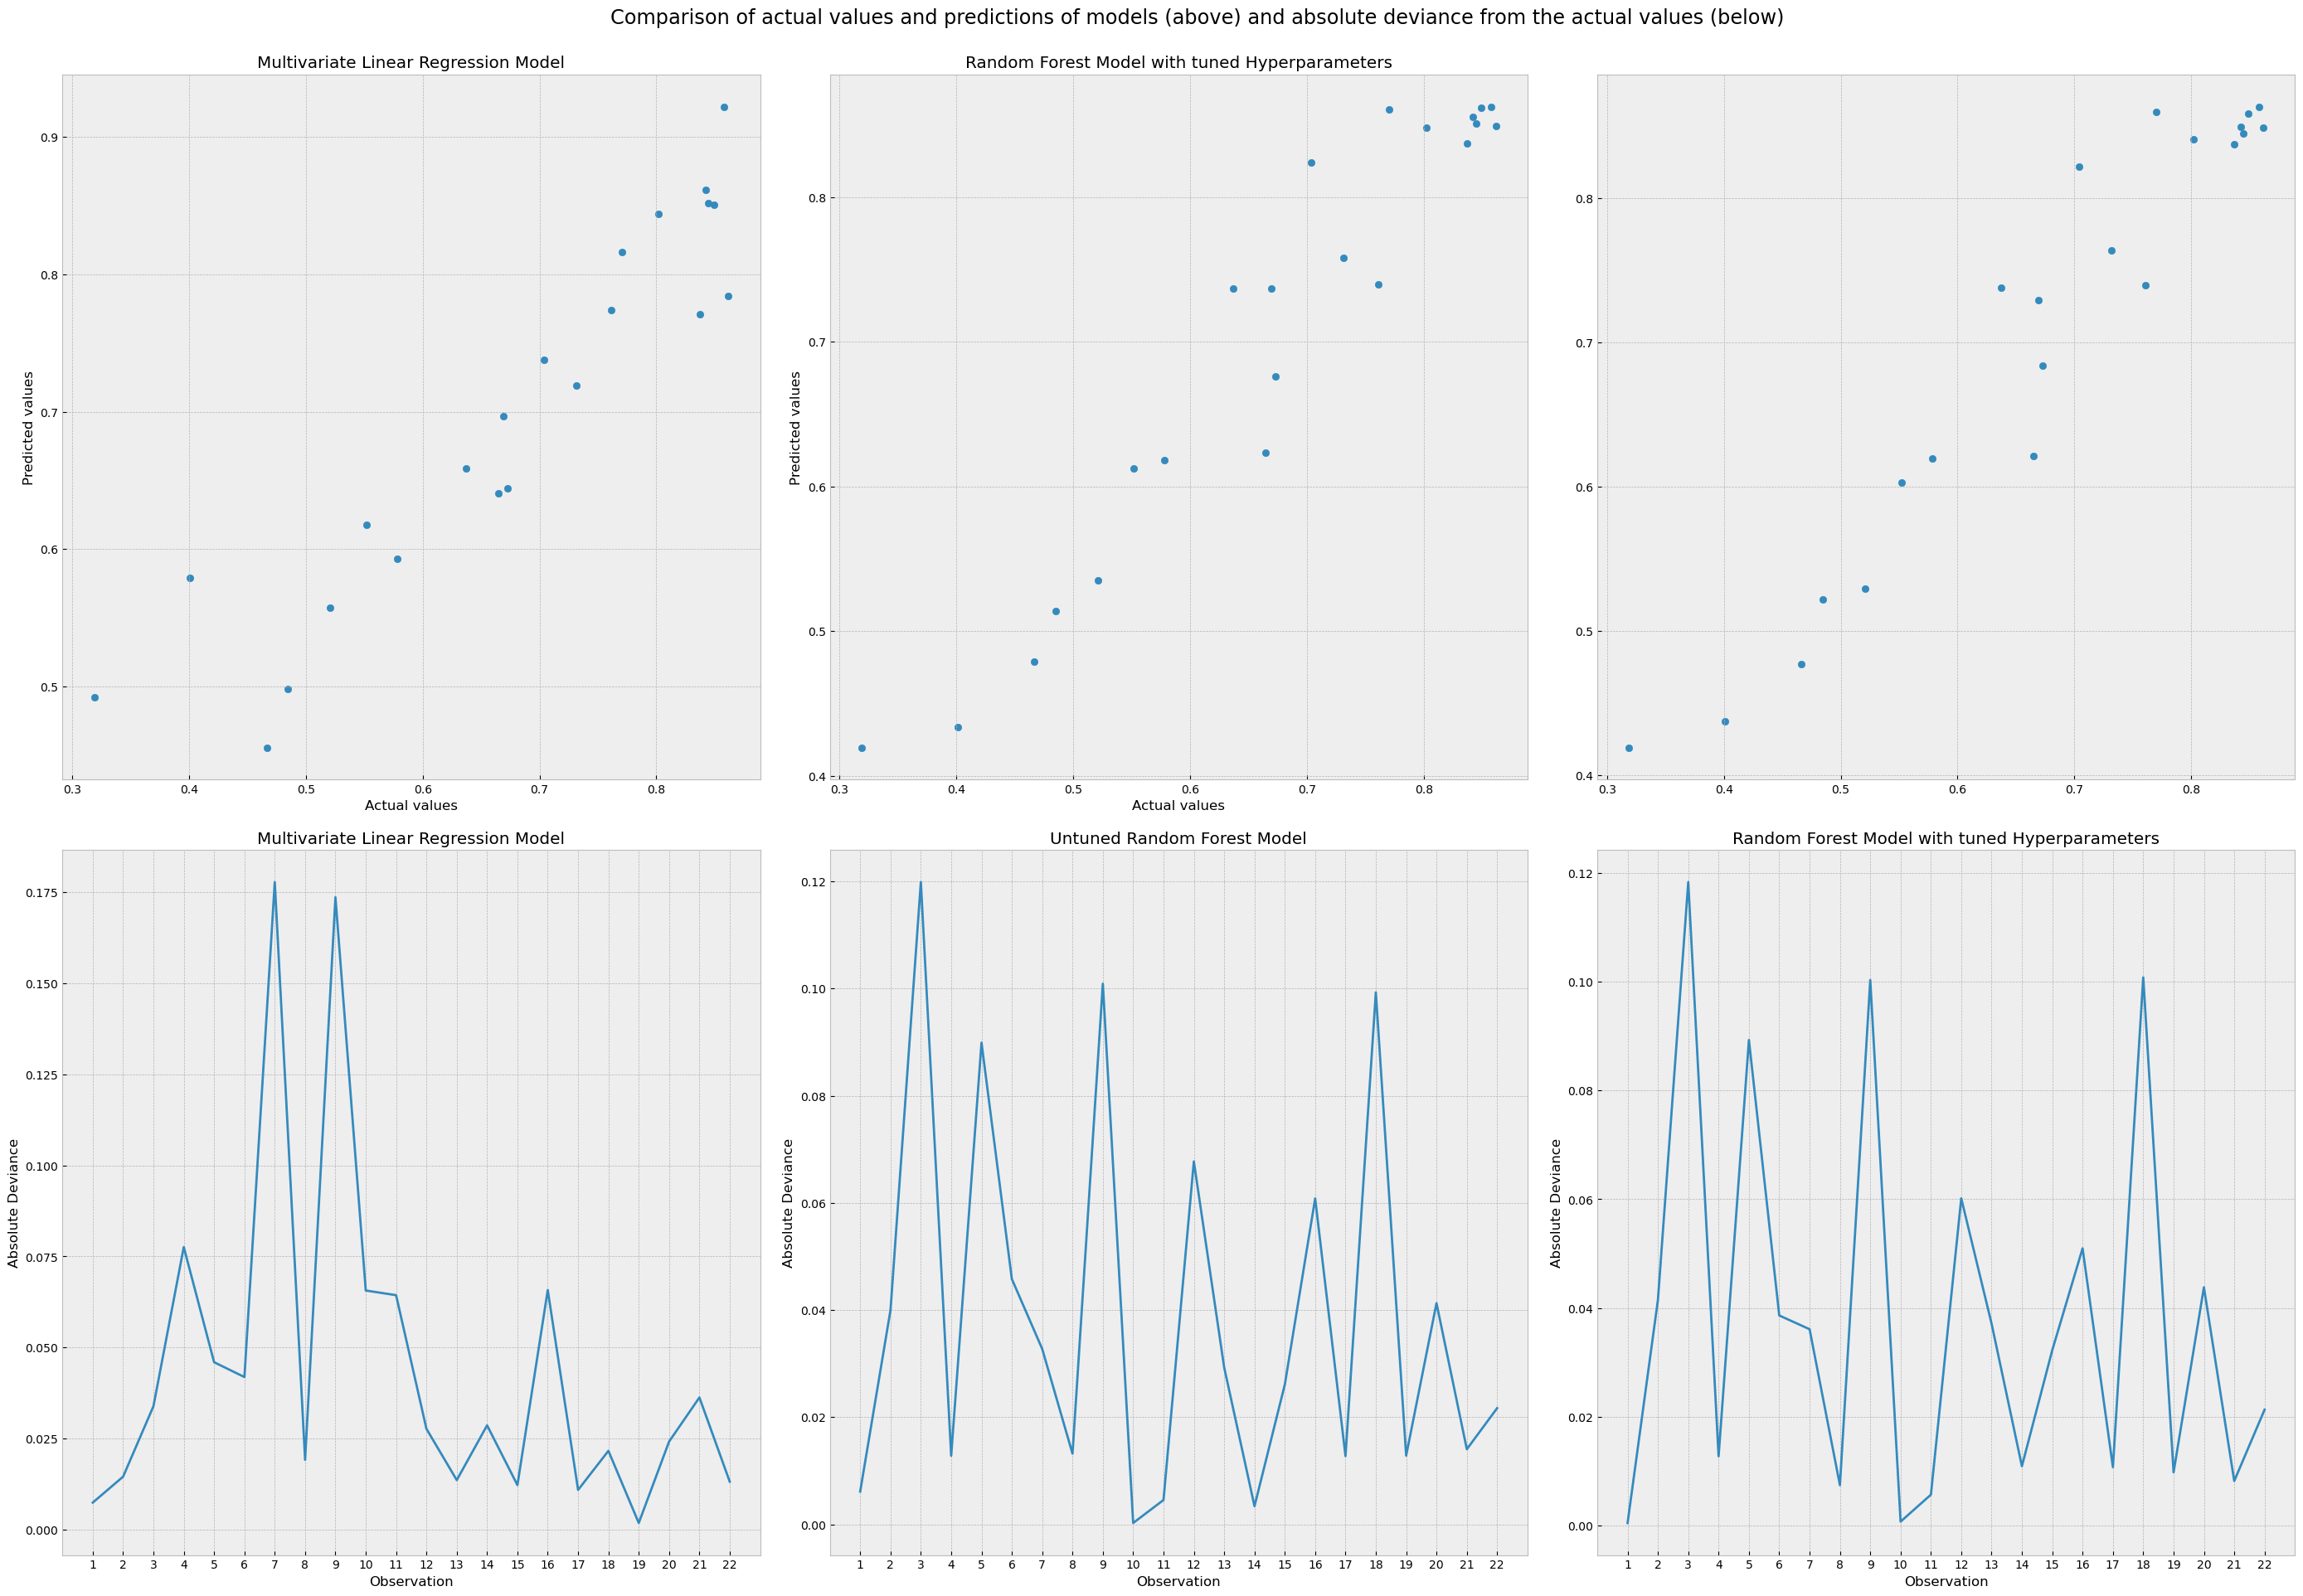

In [22]:
# 2. Plot a scatter plot of observed CLF vs. model predicted CLF for the both training and test data sets to visualize model performance and check for overfitting. 
# Do the same for a multiple linear regression model, is the machine learning model better than the multiple regression?

fig, ax = plt.subplots(nrows= 2, ncols = 3, figsize = (30,20))
plt.tight_layout(rect=[0.03, 0.03, 0.95, 0.95])
plt.suptitle("Comparison of actual values and predictions of models (above) and absolute deviance from the actual values (below)", fontsize ='xx-large')
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Scatter plots to compare actual value and predictions
ax[0][0].scatter(y_test, tr_reg.predict(X_test))
ax[0][1].scatter(y_test, standard_rf.predict(X_test))
ax[0][2].scatter(y_test, best_rf.predict(X_test))

# Line plots to show absolute deviances
ax[1][0].plot(np.arange(1, y_test.shape[0]+1), abs(np.subtract(np.concatenate(y_test.to_numpy()), tr_reg.predict(X_test))))
ax[1][1].plot(np.arange(1, y_test.shape[0]+1), abs(np.subtract(np.concatenate(y_test.to_numpy()), standard_rf.predict(X_test))))
ax[1][2].plot(np.arange(1, y_test.shape[0]+1), abs(np.subtract(np.concatenate(y_test.to_numpy()), best_rf.predict(X_test))))

ax[0][0].set_title("Multivariate Linear Regression Model")
ax[0][0].set_xlabel("Actual values")
ax[0][0].set_ylabel("Predicted values")

ax[0][1].set_title("Untuned Random Forest Model")
ax[0][1].set_xlabel("Actual values")
ax[0][1].set_ylabel("Predicted values")

ax[0][1].set_title("Random Forest Model with tuned Hyperparameters")
ax[0][1].set_xlabel("Actual values")
ax[0][1].set_ylabel("Predicted values")


ax[1][0].set_title("Multivariate Linear Regression Model")
ax[1][0].set_xlabel("Observation")
ax[1][0].set_ylabel("Absolute Deviance")

ax[1][1].set_title("Untuned Random Forest Model")
ax[1][1].set_xlabel("Observation")
ax[1][1].set_ylabel("Absolute Deviance")

ax[1][2].set_title("Random Forest Model with tuned Hyperparameters")
ax[1][2].set_xlabel("Observation")
ax[1][2].set_ylabel("Absolute Deviance")

ax[1][0].set_xlim(0,23)
ax[1][0].set_xticks(np.arange(1,23))

ax[1][1].set_xlim(0,23)
ax[1][1].set_xticks(np.arange(1,23))

ax[1][2].set_xlim(0,23)
ax[1][2].set_xticks(np.arange(1,23))


The fact that the scatter plot is almost diagonal means that predictions and actual values are very close to each other. This affirms the insights gained using the statistical metrics. <br>
The multivariate LRM has less, but more extreme outliers. This was also observed using the MSE.  <br>
The differences between standard and tuned RF is not that great. There are both predictions where the untuned RF is more accurate (e.g., observation 14 or 18) and predictions where the tuned RF is more accurate (e.g. observations 1, 3 or 21). 

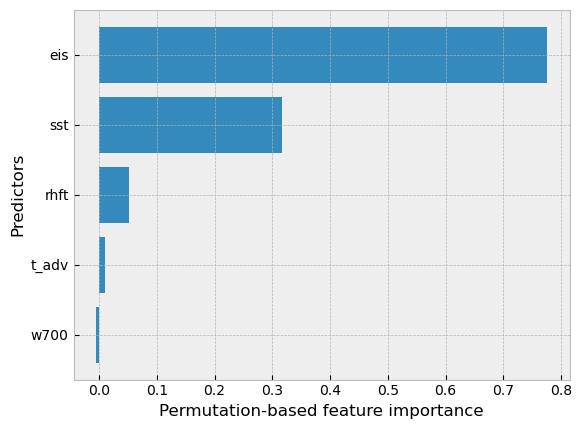

[ 0.31643407  0.77601547  0.00993834 -0.00526374  0.05233806]


In [23]:
# 3. Which predictors are most important for the model to predict CLF? [feature importance]
from sklearn.inspection import permutation_importance

# Create dataframe to make plotting easier
feat_imp = pd.concat([pd.DataFrame(t.columns, columns=["name"]), pd.DataFrame(permutation_importance(best_rf, X_test, y_test, random_state=17).importances_mean, columns=["values"])], axis=1)

# Plot permutation importances
plt.barh(width = feat_imp.sort_values("values")["values"], y = feat_imp.sort_values("values")["name"])
plt.xlabel("Permutation-based feature importance")
plt.ylabel("Predictors")
plt.show()

print(permutation_importance(best_rf, X_test, y_test, random_state=17).importances_mean)

The most important predictor in the tuned RF is eis (~0.78). <br> Its permutation importance is almost double that of the following predictor sst (~0.32). <br> sst itself is six times as important as rhft (~0.05). <br> Both t_adv and w700 are negligible, though it has to be noted that the permutation importance of w700 is slightly negative.  

In [24]:
r = RandomForestRegressor(random_state = 17, verbose=0)

# Define bounds for the hyperparameters in random search
rshp = {'bootstrap': [True, False],
 'max_depth': [40, 50, 60, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1800, 2000, 2200]}

# Conduct random search
rr = RandomizedSearchCV(r, rshp, n_iter = 100, n_jobs = -1, verbose = 0, cv = 3)

# Fit model to data
rr.fit(t.drop(["clf"], axis=1), t.clf)
best_r = rr.best_estimator_

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


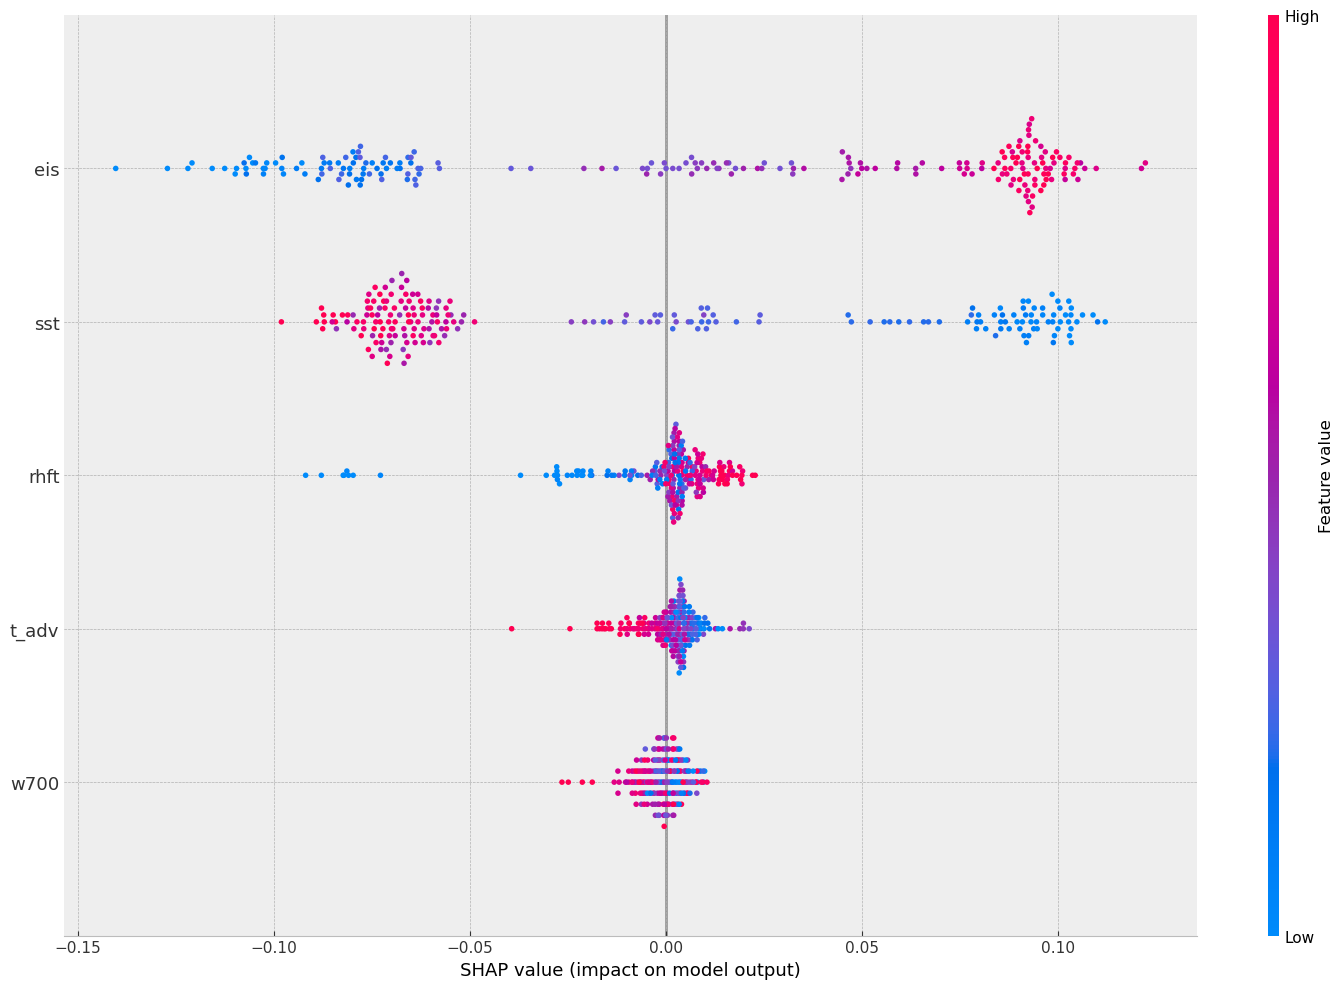

In [25]:
# 4. Analyze the two most important meteorological features in more detail: How do they influence the prediction of CLF? [partial dependency, SHAP] 

import shap

explainer = shap.TreeExplainer(best_r)
shap_values = explainer.shap_values(t.drop(["clf"], axis=1))
shap.summary_plot(shap_values, t.drop(["clf"], axis=1), plot_size=[15,10])

In [26]:
# Show statistical measures to evaluate the SHAP values
shp = pd.DataFrame(shap_values)
shp.rename(columns={0:'sst', 1:'eis', 2:'t_adv', 3: 'w700', 4: 'rhft'}, inplace=True)
print(shp.min(), "\n")
print(shp.mean(), "\n")
print(shp.max(), "\n")
print(shp.std())

sst     -0.098122
eis     -0.140365
t_adv   -0.039411
w700    -0.026587
rhft    -0.091946
dtype: float64 

sst     -0.009110
eis      0.010549
t_adv    0.000991
w700    -0.000941
rhft    -0.001432
dtype: float64 

sst      0.111919
eis      0.122157
t_adv    0.021157
w700     0.010382
rhft     0.022681
dtype: float64 

sst      0.071834
eis      0.079548
t_adv    0.007530
w700     0.005712
rhft     0.019360
dtype: float64


As was the case with the permutation importances, eis has the largest absolute influence on the predictor. It has a positive influence for large values and a negative influence for small values. It also has the largest standard deviation. Its mean influence is negligibly positive. <br>
sst has a negative influence for larger values and a positive influence for smaller values. As was the case in previous results (correlation and multivariate LRM), its mean influence is negative.<br>
rhft has almost no variance in case of large values and is clustered around the positive origin in that case. For small values its SHAP values are widespread around the negative x-axis. Its mean influence is negative, although negligible. <br> 
t_adv behaves similarly to rhft in that it clusters around the positive origin and is more widespread for negative SHAP values. Unlike rhft it returns positive SHAP values for small feature values and negative SHAP values for large feature values.<br>
w700 behaves similarly to t_adv but has a smaller overall range.


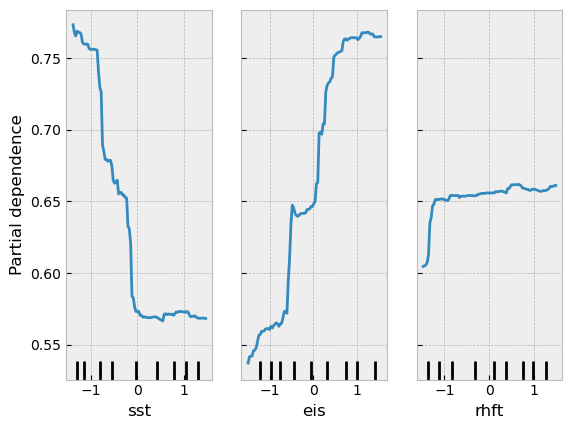

In [30]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(best_r, t, features=["sst", "eis", "rhft"], kind="average", n_jobs=-1,random_state=0)
plt.show()

sst and eis have a relationship that is contrary to each other. This is also supported by the negative correlation found earlier. <br>
rhft has a lower marginal effect on the prediction for lower values and is increasing monotonously for larger feature values. <br>


Results and comparison with Klein et al. (2017)



The authors state that there is a positive relationship between eis and clf and that it is the strongest of all relationships. This is supported by the correlation during the data exploration, as well as the findings using the coefficients of the LRM, the feature importances, the SHAP values and the partial dependencies. <br>
It is further shown that both colder sea surface temperatures, as well as higher relative humidity in the free troposphere reduce entrainment, which results in a larger amount of water in the cloud. Thus, clf is increased. This is in accordance with the findings above for the sst. While the permutation importance and the coefficient of the LRM are positive for RHFT, its SHAP value is negligibly negative. Due to the small value and the behaviour of RHFT in other models it is possible to conclude that the influence of RHFT is positive, thus, supporting Klein et al..<br>
According to Norris and Iacobellis (2005), which are cited by Klein et al. (2017), increased temperature advection leads to more cloud cover and thus, higher clf. This can also be seen in the findings of part one. <br>

Klein et. al (2017) also state that reduced subsidence (negative values for w700) lead to a deeper boundary layer, which increases clf. This negative relationship between clf and w700 can be observed in both the SHAP values and the feature importances. It is contrary to the feature coefficients of the LRM though. But since w700 is not significant in the LRM, this is likely to be wrong. In addtion the overall accuracy of the random forest model is higher than that of the LRM, which means that its results should be preferred. 

They also find that separation of influences is hard due to the multicolinearity of the predictors. This can also be seen in the results in part one. To obtain better results using the variance inflation factor to identify harmful correlations and feature selection or pca / ica thereafter is recommended. 

## Part two: Classification in a remote sensing retrieval setting

__Task__
1. Divide data into test and training data sets
2. Train and optimize (hyperparameter tuning) a machine learning model 
3. Train a logistic regression model
4. Analyze both classifiers with a confusion matrix and perfomance metrics

In [218]:
import xarray as xr
import matplotlib.pyplot as plt

data = xr.open_dataset('data_final_task_classification.nc') # load the data set
X = data[['IR_016','IR_039','IR_087','IR_097','IR_108','IR_120','IR_134']] # define X to be the satellite observations from different channels
X['hour'] = data.time['time.hour'] # use the hour of the observation as an additional predictor
X = X.to_dataframe() # convert to a pandas data frame

y = data.station_fls # define y to be the True/False labels from the meteorological station

In [3]:
# 1. Divide data into test and training data sets
# from sklearn.model_selection import train_test_split
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, y.values, test_size=0.3, random_state=17)


In [6]:
# 2. Train and optimize (hyperparameter tuning) a machine learning model 
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# Initialize a random forest model
rfc = RandomForestClassifier(random_state = 17, verbose=0)

# Define bounds for the hyperparameters in random search
rfcrshp = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Conduct random search
rfcrs = RandomizedSearchCV(rfc, rfcrshp, n_iter = 100, n_jobs = -1, verbose = 0, cv = 3)

# Fit the model to the data
rfcrs.fit(X_trainc, y_trainc)
best_rfc = rfcrs.best_estimator_

c:\Users\mfher\miniconda3\envs\ds\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [152]:
# 3. Train a logistic regression model
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 17)
lrc.fit(X_trainc, y_trainc)

LogisticRegression(random_state=17)

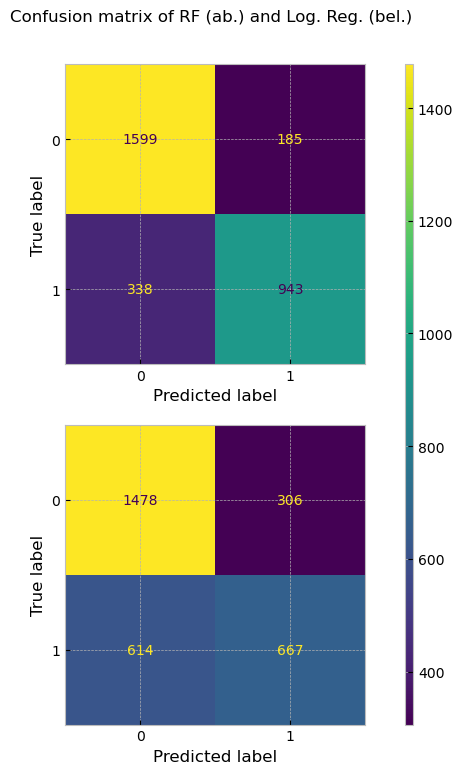

In [198]:
# 4. Analyze both classifiers with a confusion matrix and perfomance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(2,figsize = (4,8))
plt.tight_layout(rect=[0.03, 0.03, 0.95, 0.95])
plt.suptitle("Confusion matrix of RF (ab.) and Log. Reg. (bel.)", fontsize ='large')
plt.subplots_adjust(wspace=-0.3)

y_predrfc = rfcrs.predict(X_testc)
CMrfc = confusion_matrix(y_testc, y_predrfc)
disprfc = ConfusionMatrixDisplay(CMrfc)

y_predlr = lrc.predict(X_testc)
CMlr = confusion_matrix(y_testc, y_predlr)
displr = ConfusionMatrixDisplay(CMlr)

# Confusion Matrices
disprfc.plot(ax=ax[0])
displr.plot(ax=ax[1])

disprfc.im_.colorbar.remove()
displr.im_.colorbar.remove()

# Add a single colorbar for both plots
cax = fig.add_axes([ax[1].get_position().x1+0.1,ax[1].get_position().y0,0.02,ax[0].get_position().y1-ax[1].get_position().y0])
fig.colorbar(displr.im_, cax=cax)

plt.show()


In [212]:
# Metrics for the Random Forest Classifier 

# True positives
TPR = CMrfc[0][0]

# False positives
FPR = CMrfc[0][1]

# True negatives
TNR = CMrfc[1][1]

# False negatives
FNR = CMrfc[1][0]

# Recall
RECR = TPR/(TPR+FPR)*100.0
print("Recall: %.2f%%"%(RECR))

# Precision
PECR = (TPR+TNR)/sum(sum((CMrfc)))*100.0
print("Precision: %.2f%%"%(RECR))

# False Alarm Rate
FARR=FPR/(FPR+TPR)*100
print("False Alarm Rate: %.2f%%"%(FARR))

# F1-Score
FOR = 2* (PECR*RECR) / (PECR + RECR) / 100
print("F1-Score: %.2f"%(FOR))

Recall: 89.63%
Precision: 89.63%
False Alarm Rate: 10.37%
F1-Score: 0.86


In [213]:
# Metrics for the Logistic Regression 

# True positives
TPL = CMlr[0][0]

# False positives
FPL = CMlr[0][1]

# True negatives
TNL = CMlr[1][1]

# False negatives
FNL = CMlr[1][0]

# Recall
RECL = TPL/(TPL+FPL)*100.0
print("Recall: %.2f%%"%(RECL))

# Precision
PECL = (TPL+TNL)/sum(sum((CMlr)))*100.0
print("Precision: %.2f%%"%(RECL))

# False Alarm Rate
FARL=FPL/(FPL+TPL)*100
print("False Alarm Rate: %.2f%%"%(FARL))

# F1-Score
FOL = 2* (PECL*RECL) / (PECL + RECL) / 100
print("F1-Score: %.2f"%(FOL))

Recall: 82.85%
Precision: 82.85%
False Alarm Rate: 17.15%
F1-Score: 0.76


Both Recall and Precision are almost 7% higher for the RF model. This in turn also means a lower false alarm rate. The F1-Score of the RF model is also higher by 0.1 in comparison with that of the logistic regression.

Comparison to Andersen et al. (2018):
In Andersen et al. (2018) classification is done using a decision tree. This means that the result of the random forest model should be similar to the result of the authors. This is not the case. The Authors note a recall of 94%. They also note a precision of 97%. This in turn results in an F1-Score of 0.95, which is greater, by almost 0.1, than the score the RF model was able to attain. This means that either the amount of training data does not suffice, or that the model is overfitting. The latter indicates that more hyperparameter tuning is in order to achieve greater results.
